# Mengukur Performa Penjualan Ritel Online

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_retail_II.csv')

In [3]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1032297,579158,23355,HOT WATER BOTTLE KEEP CALM,8,2011-11-28 13:53:00,4.95,17188.0,United Kingdom
606521,543108,22840,ROUND CAKE TIN VINTAGE RED,1,2011-02-03 12:37:00,7.95,14085.0,United Kingdom
988350,576025,22065,CHRISTMAS PUDDING TRINKET POT,1,2011-11-13 14:34:00,0.39,13232.0,United Kingdom
596827,542121,82567,"AIRLINE LOUNGE,METAL SIGN",2,2011-01-25 14:33:00,2.10,17515.0,United Kingdom
462957,533096,21110,LARGE CAKE TOWEL PINK SPOTS,2,2010-11-16 10:56:00,6.75,14911.0,EIRE
25630,491622,72598,SET/12 TAPER CANDLES,5,2009-12-11 14:20:00,0.85,13415.0,United Kingdom
558685,539242,21094,SET/6 RED SPOTTY PAPER PLATES,4,2010-12-16 13:16:00,0.85,NaN,United Kingdom
1062335,581223,22744,MAKE YOUR OWN MONSOON CARD KIT,12,2011-12-08 09:46:00,0.79,15237.0,United Kingdom
983838,575830,22847,BREAD BIN DINER STYLE IVORY,1,2011-11-11 11:34:00,16.95,14226.0,United Kingdom
260371,514508,22399,MAGNETS PACK OF 4 CHILDHOOD MEMORY,24,2010-07-04 13:07:00,1.25,13093.0,United Kingdom


In [4]:
df.shape

(1067371, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Section 1

### Create New Feature: Year

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [8]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year

In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Filtering Data

Kolom Quantiti minimal 1 dan kolom Invoice tidak boleh mengandung huruf 'C'

In [10]:
sales = df[(df['Quantity'] >= 1) & (df['Invoice'].str.contains('C') == False)]

In [11]:
sales.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
814604,562222,22697,GREEN REGENCY TEACUP AND SAUCER,12,2011-08-03 14:33:00,2.95,18073.0,United Kingdom,2011
115016,500341,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-03-07 14:31:00,0.42,16466.0,United Kingdom,2010
770161,558540,21673,WHITE SPOT BLUE CERAMIC DRAWER KNOB,36,2011-06-30 12:15:00,1.25,17706.0,United Kingdom,2011
619164,544306,20749,ASSORTED COLOUR MINI CASES,2,2011-02-17 13:57:00,7.95,13085.0,United Kingdom,2011
567490,539958,22200,FRYING PAN PINK POLKADOT,1,2010-12-23 13:26:00,8.47,NaN,United Kingdom,2010
841278,564735,22157,ANGEL DECORATION WITH LACE PADDED,48,2011-08-28 13:35:00,0.85,15856.0,United Kingdom,2011
465077,533314,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2010-11-16 17:12:00,4.95,13158.0,United Kingdom,2010
339746,522526,22457,NATURAL SLATE HEART CHALKBOARD,6,2010-09-15 11:49:00,2.95,16143.0,United Kingdom,2010
847160,565197,21669,BLUE STRIPE CERAMIC DRAWER KNOB,12,2011-09-01 16:16:00,1.25,13376.0,United Kingdom,2011
277335,516327,84969,ASSORTED COLOUR SET 6 TEASPOONS,4,2010-07-19 15:58:00,4.25,17589.0,United Kingdom,2010


### Create New Feature: Revenue

In [ ]:
sales['Revenue'] = df['Quantity'] * df['Price']

In [13]:
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [14]:
df_avg = sales.groupby('Year')['Revenue'].mean().reset_index()

In [15]:
df_avg

,Year,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


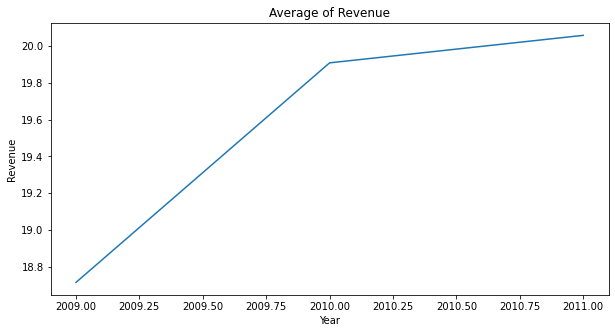

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df_avg['Year'], df_avg['Revenue'])
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Average of Revenue")
plt.show()

### Interpretation

Dari grafik diatas dapat disimpulkan performa penjualan dalam kondisi baik karena dalam 3 tahun terakhir rata-rata pendapatan pertahun terus meningkat.
Rata-rata pendapatan pertahun meningkat dari 18.713273 di tahun 2009 menjadi 19.908987. Dan pada tahun 2011 rata-rata pendapatan pertahun mencapai 20.058767.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [17]:
finished = sales[sales['Customer ID'].notna()]

In [18]:
finished.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
485808,534814,35961,FOLKART ZINC HEART CHRISTMAS DEC,2,2010-11-24 12:45:00,0.85,16794.0,United Kingdom,2010,1.70
498870,536001,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2010-11-29 14:21:00,0.55,17814.0,United Kingdom,2010,13.20
628404,545045,71038,WHITE HANGING BEADS CANDLE HOLDER,4,2011-02-27 11:40:00,5.45,15708.0,United Kingdom,2011,21.80
204654,509155,22614,PACK OF 12 SPACEBOY TISSUES,12,2010-05-20 13:18:00,0.29,17758.0,United Kingdom,2010,3.48
12471,490395,21212,PACK OF 72 RETRO SPOT CAKE CASES,24,2009-12-06 10:16:00,0.55,13813.0,Germany,2009,13.20


In [19]:
finished.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
 8   Year         805620 non-null  int64         
 9   Revenue      805620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 67.6+ MB


#### Customers who canceled their purchases

In [20]:
cancel = df[df['Invoice'].str.contains('C')]

In [21]:
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


In [22]:
cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19494 entries, 178 to 1067178
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      19494 non-null  object        
 1   StockCode    19494 non-null  object        
 2   Description  19494 non-null  object        
 3   Quantity     19494 non-null  int64         
 4   InvoiceDate  19494 non-null  datetime64[ns]
 5   Price        19494 non-null  float64       
 6   Customer ID  18744 non-null  float64       
 7   Country      19494 non-null  object        
 8   Year         19494 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.5+ MB


### Number of Finished and Canceled Transactions Each Year

In [23]:
ts_finished = finished.groupby('Year')['Invoice'].count().reset_index()

In [24]:
ts_finished

,Year,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


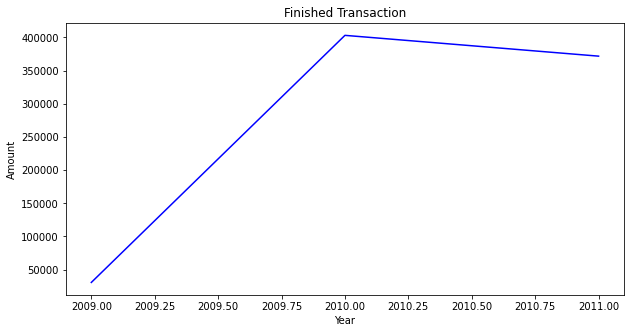

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(ts_finished['Year'], ts_finished['Invoice'], color='blue')
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Finished Transaction")
plt.show()

In [26]:
ts_cancel = cancel.groupby('Year')['Invoice'].count().reset_index()

In [27]:
ts_cancel

,Year,Invoice
0,2009,1015
1,2010,9919
2,2011,8560


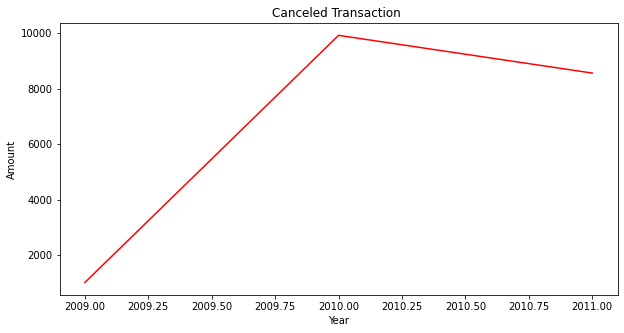

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(ts_cancel['Year'], ts_cancel['Invoice'], color='red')
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Canceled Transaction ")
plt.show()

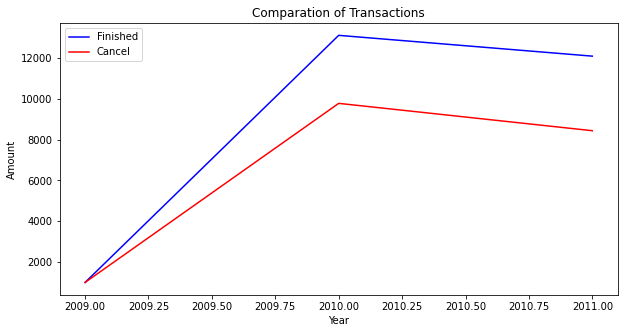

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(ts_finished['Year'], ts_finished['Invoice']/ts_finished['Invoice'].iloc[0]*[1000], color = 'blue')
plt.plot(ts_cancel['Year'], ts_cancel['Invoice']/ts_cancel['Invoice'].iloc[0]*[1000], color = 'red')
plt.legend(['Finished','Cancel'])
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Comparation of Transactions")
plt.show()

### Cancellation Rate

In [30]:
customer = df.groupby('Year')['Customer ID'].count()
cl_customer = cancel.groupby('Year')['Customer ID'].count()

print("Jumlah Customer")
print(customer.reset_index())
print("\n Jumlah Customer yang membatalkan transaksi")
print(cl_customer.reset_index())

Jumlah Customer
   Year  Customer ID
0  2009        31760
1  2010       412624
2  2011       379980

 Jumlah Customer yang membatalkan transaksi
   Year  Customer ID
0  2009          999
1  2010         9530
2  2011         8215


In [31]:
cancellation_rate = (cl_customer / customer * 100 ).reset_index()
cancellation_rate.rename({'Customer ID':'Cancellation Rate'},axis='columns')

,Year,Cancellation Rate
0,2009,3.145466
1,2010,2.309609
2,2011,2.161956


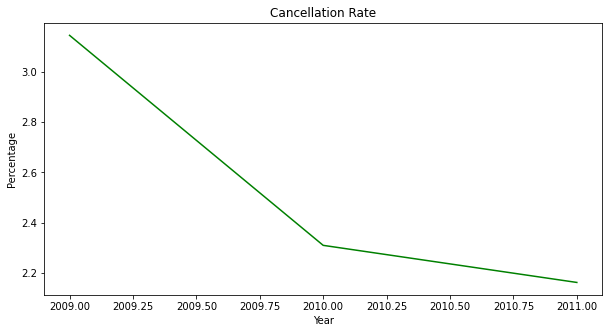

In [32]:
plt.figure(figsize=(10,5))
plt.plot(cancellation_rate['Year'], cancellation_rate['Customer ID'], color='green')
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Cancellation Rate")
plt.show()

### Interpretation

Hasil analisis dari Grafik diatas dapat di ambil kesimpulan sebagai berikut :


*   Jumlah transaksi yang berhasil mengalami peningkatan dalam 3 tahun terakhir. Dari 30761 trasaksi di tahun 2009 meningkat menjadi 403094 di tahun 2019. Sedangkan pada tahun 2011 jumlah transaksi yang berhasil mengalami penurunan menjadi 371765
*   Untuk jumlah transaksi yang dibatalkan juga mengalami pola yang sama seperti jumlah transaksi yang berhasil. yaitu mengalami peningkatan dari 1015 di tahun 2009 hingga 9919 di tahun 2010, dan di tahun 2011 jumlah transaksi yang dibatalkan kembali menurun menjadi 8560
* Jika dilihat dari grafik Cancellation Rate yang terus menurun setiap tahunya, tetapi untuk grafik transaksi yang dibatalkan bisa meningkat dari tahun 2009 ke tahun 2010 dikarenakan adanya peningkatan jumlah customer yang tinggi, sehingga peningkatan transaksi yang dibatalkan oleh customer pada rentang tahun tersebut juga ikut meningkat.
* Untuk peningkatan jumlah customer yang paling tinggi berada di tahun 2010, hal ini menyebabkan menyebabkan lonjakan yang tinggi untuk transaksi yang berhasil dilakukan oleh customer pada tahun tersebut.







